In [1]:
import pandas as pd
import numpy as np
import random 
import os
import json

from sklearn.preprocessing import MinMaxScaler

pd.set_option('display.max_rows', 50)


from functions import run_clustering_model # sharpe_ratio_calculation, generate_rand_portfolios, select_top_five, join_stocks_crypto, evaluate_clustering_stability, 

c:\Users\Kirill\Documents\Projects\thesis\venv312\Lib\site-packages\tslearn\bases\bases.py:15: UserWarning: h5py not installed, hdf5 features will not be supported.
Install h5py to use hdf5 features: http://docs.h5py.org/
  warn(h5py_msg)


In [2]:
cryptos_df = pd.read_csv('cryptos_data_new.csv', index_col='timestamp')
cryptos_df.index = pd.to_datetime(cryptos_df.index)

cryptos_df_weekly = cryptos_df.resample('W').last() #aggregating on a weekly level
cryptos_df_3days = cryptos_df.resample('3D').last()# aggregating on a twice per week basis to arrive at the sweet spot of that 250 (1 year) timeseries length

In [4]:
from functions import test_clustering_metrics
random.seed(42)


n_clusters_list = [2,3,4,5,6,7]
df_with_label_balance = pd.DataFrame()
#linkage_list = ['average', 'complete', 'single']
method = 'kshape'
for window in [1,7,10,14,30,60]:
    for df_dict in [{'weekly': cryptos_df_weekly}, {'3day': cryptos_df_3days}, {'full': cryptos_df}]:
        if method != 'ahc':
            linkage_list = None
        print(f'Doing window size {window} with {list(df_dict.keys())[0]} aggregation')
        output = test_clustering_metrics(df_dict, n_clusters_list, method=method, linkage_list=linkage_list, 
                               return_mode='geometric', window=window, n_init=3)
        df_with_label_balance = pd.concat([df_with_label_balance, output])

df_with_label_balance.to_csv(f'NEW_CLUSTERING_TUNING_FINAL/cryptos_only/{method}.csv', index=False)

Doing window size 1 with weekly aggregation
Doing window size 1 with 3day aggregation
Doing window size 1 with full aggregation
Doing window size 7 with weekly aggregation
Doing window size 7 with 3day aggregation
Doing window size 7 with full aggregation
Doing window size 10 with weekly aggregation
Doing window size 10 with 3day aggregation
Doing window size 10 with full aggregation
Doing window size 14 with weekly aggregation
Doing window size 14 with 3day aggregation
Doing window size 14 with full aggregation
Doing window size 30 with weekly aggregation
Doing window size 30 with 3day aggregation
Doing window size 30 with full aggregation
Doing window size 60 with weekly aggregation
Doing window size 60 with 3day aggregation
Doing window size 60 with full aggregation


In [3]:
#kmeans_results = pd.read_csv('NEW_CLUSTERING_TUNING_FINAL/cryptos_only/kmeans.csv')
kshape_results = pd.read_csv('NEW_CLUSTERING_TUNING_FINAL/cryptos_only/kshape.csv')
#ahc_results = pd.read_csv('NEW_CLUSTERING_TUNING_FINAL/cryptos_only/ahc.csv')

results = pd.concat([kshape_results])

In [4]:
results[['silhouette_norm']] = MinMaxScaler().fit_transform(results[['silhouette_score']])
results['entropy_norm_clusters'] = results['entropy'] / np.log2(results['clusters']) #normalize relative to the K clusters


# Filter on only strong silhouette values and reasonable entropy
results_filtered = results[results['silhouette_norm'] > 0.5]
results_filtered = results_filtered[results_filtered['entropy_norm_clusters'] > 0.6]

# Compute total score: average of silhouette and normalized entropy
#results_filtered['total_score'] = (results_filtered['silhouette_norm'] + results_filtered['entropy_norm_clusters']) / 2

In [5]:
results_filtered

,clusters,silhouette_score,method,linkage,return_mode,window_size,df_mode,inertia,entropy,silhouette_norm,entropy_norm_clusters
0,2,0.167627,kshape,not_applicable,geometric,1,weekly,0.041625,0.7121,0.612494,0.712100
19,3,0.165450,kshape,not_applicable,geometric,7,weekly,0.020337,1.3413,0.608706,0.846266
24,2,0.221014,kshape,not_applicable,geometric,7,3day,0.034804,0.6594,0.705366,0.659400
32,4,0.106730,kshape,not_applicable,geometric,7,full,0.030333,1.2811,0.506556,0.640550
37,3,0.257988,kshape,not_applicable,geometric,10,weekly,0.019415,1.3146,0.769687,0.829420
38,4,0.132504,kshape,not_applicable,geometric,10,weekly,0.018317,1.8163,0.551393,0.908150
40,6,0.114961,kshape,not_applicable,geometric,10,weekly,0.012781,2.0598,0.520874,0.796839
46,6,0.104973,kshape,not_applicable,geometric,10,3day,0.023576,2.0193,0.503501,0.781172
49,3,0.109650,kshape,not_applicable,geometric,10,full,0.031805,1.0383,0.511636,0.655094
55,3,0.293839,kshape,not_applicable,geometric,14,weekly,0.019539,1.3672,0.832054,0.862607


In [ ]:
#CLUSTERING STABILITY
from functions import evaluate_clustering_stability
filtered_results_with_stability = results_filtered.copy()
for row in filtered_results_with_stability.iterrows():

    method = row[1]['method']
    linkage = row[1]['linkage']
    window_size = row[1]['window_size']
    n_clusters = row[1]['clusters']
    if row[1]['df_mode'] == '3day':
        agg_level = 3
    elif row[1]['df_mode'] == 'weekly':
        agg_level = 5
    else:
        agg_level = 1

    results = evaluate_clustering_stability(cryptos_df, n_clusters=n_clusters, window_size=252, step_size=30, agg_level=agg_level, smoothing_window=window_size, method=method, linkage=linkage, crypto_only=True)
    if len(results) > 20:
        break
    ari_mean = results['ari'].mean()
    nmi_mean = results['nmi'].mean()

    filtered_results_with_stability.loc[row[0], 'ari_mean'] = ari_mean
    filtered_results_with_stability.loc[row[0], 'nmi_mean'] = nmi_mean

filtered_results_with_stability.to_csv('filtered_results_with_stability_CRYPTOS_ONLY.csv')

Exception ignored on calling ctypes callback function: <function ExecutionEngine._raw_object_cache_notify at 0x0000023D11265C60>
Traceback (most recent call last):
  File "c:\Users\Kirill\Documents\Projects\thesis\venv312\Lib\site-packages\llvmlite\binding\executionengine.py", line 178, in _raw_object_cache_notify
    def _raw_object_cache_notify(self, data):

KeyboardInterrupt: 


In [13]:
filtered_results_with_stability = pd.read_csv('filtered_results_with_stability_CRYPTOS_ONLY.csv')
filtered_results_with_stability['ari_norm'] = MinMaxScaler().fit_transform(filtered_results_with_stability[['ari_mean']])
filtered_results_with_stability['nmi_norm'] = MinMaxScaler().fit_transform(filtered_results_with_stability[['nmi_mean']])
filtered_results_with_stability['stability_score'] = (filtered_results_with_stability['nmi_norm'] + filtered_results_with_stability['ari_norm']) / 2


filtered_results_with_stability['renormalized_silhouette'] = MinMaxScaler().fit_transform(filtered_results_with_stability[['silhouette_score']])
filtered_results_with_stability['renormalized_inertia'] = 1 - MinMaxScaler().fit_transform(filtered_results_with_stability[['inertia']])
filtered_results_with_stability['renormalized_stability'] = 1 - MinMaxScaler().fit_transform(filtered_results_with_stability[['stability_score']])

filtered_results_with_stability['final_score'] = filtered_results_with_stability[['renormalized_silhouette']].mean(axis=1)

In [14]:
filtered_results_with_stability.sort_values('final_score', ascending=False)

,Unnamed: 0,clusters,silhouette_score,method,linkage,return_mode,window_size,df_mode,inertia,entropy,...,entropy_norm_clusters,ari_mean,nmi_mean,ari_norm,nmi_norm,stability_score,renormalized_silhouette,renormalized_inertia,renormalized_stability,final_score
20,79,3,0.309174,kshape,not_applicable,geometric,30,3day,0.017378,1.3374,...,0.843805,0.217759,0.250324,0.417306,0.490037,0.453671,1.000000,0.758410,0.516671,1.000000
19,78,2,0.300994,kshape,not_applicable,geometric,30,3day,0.027425,0.6006,...,0.600600,0.256636,0.215981,0.498345,0.404680,0.451512,0.960186,0.457669,0.518971,0.960186
9,55,3,0.293839,kshape,not_applicable,geometric,14,weekly,0.019539,1.3672,...,0.862607,0.227118,0.248191,0.436815,0.484734,0.460775,0.925356,0.693743,0.509103,0.925356
16,72,2,0.271173,kshape,not_applicable,geometric,30,weekly,0.039137,0.7121,...,0.712100,0.017560,0.053158,0.000000,0.000000,0.000000,0.815029,0.107096,1.000000,0.815029
4,37,3,0.257988,kshape,not_applicable,geometric,10,weekly,0.019415,1.3146,...,0.829420,0.268186,0.304737,0.522420,0.625276,0.573848,0.750848,0.697442,0.388638,0.750848
22,81,5,0.249951,kshape,not_applicable,geometric,30,3day,0.011253,2.0242,...,0.871775,0.153833,0.344028,0.284056,0.722928,0.503492,0.711728,0.941758,0.463593,0.711728
31,101,7,0.244537,kshape,not_applicable,geometric,60,3day,0.010720,2.3850,...,0.849554,0.091269,0.359995,0.153644,0.762614,0.458129,0.685376,0.957714,0.511922,0.685376
26,96,2,0.237554,kshape,not_applicable,geometric,60,3day,0.042715,0.8390,...,0.839000,0.096126,0.088275,0.163766,0.087280,0.125523,0.651387,0.000000,0.866271,0.651387
2,24,2,0.221014,kshape,not_applicable,geometric,7,3day,0.034804,0.6594,...,0.659400,0.391689,0.325345,0.779858,0.676495,0.728177,0.570874,0.236802,0.224220,0.570874
12,58,6,0.218027,kshape,not_applicable,geometric,14,weekly,0.011318,2.0598,...,0.796839,0.174323,0.406140,0.326767,0.877302,0.602035,0.556338,0.939818,0.358608,0.556338


In [15]:
coinbase_categories = {
    # Store of Value
    'BTCUSDT': 'Store of Value',
    
    # Smart Contract Platforms  
    'ETHUSDT': 'Smart Contract Platforms',
    'SOLUSDT': 'Smart Contract Platforms', 
    'ADAUSDT': 'Smart Contract Platforms',
    'AVAXUSDT': 'Smart Contract Platforms',
    'NEARUSDT': 'Smart Contract Platforms',
    'ICPUSDT': 'Smart Contract Platforms',
    'ETCUSDT': 'Smart Contract Platforms',
    'ATOMUSDT': 'Smart Contract Platforms',
    'MATICUSDT': 'Smart Contract Platforms',
    'ALGOUSDT': 'Smart Contract Platforms',
    'EOSUSDT': 'Smart Contract Platforms',
    'STXUSDT': 'Smart Contract Platforms',
    'XTZUSDT': 'Smart Contract Platforms',
    'ROSEUSDT': 'Smart Contract Platforms',
    
    # DeFi
    'UNIUSDT': 'DeFi',
    'AAVEUSDT': 'DeFi', 
    'MKRUSDT': 'DeFi',
    'CRVUSDT': 'DeFi',
    'COMPUSDT': 'DeFi',
    '1INCHUSDT': 'DeFi',
    'SNXUSDT': 'DeFi',
    
    # Infrastructure Applications & DePIN
    'LINKUSDT': 'Infrastructure Applications & DePIN',
    'RNDRUSDT': 'Infrastructure Applications & DePIN',
    'INJUSDT': 'Infrastructure Applications & DePIN',
    'GRTUSDT': 'Infrastructure Applications & DePIN',
    'LPTUSDT': 'Infrastructure Applications & DePIN',
    'QNTUSDT': 'Infrastructure Applications & DePIN',
    'DOTUSDT': 'Infrastructure Applications & DePIN',
    
    # Media & Entertainment
    'SANDUSDT': 'Media & Entertainment',
    'MANAUSDT': 'Media & Entertainment', 
    'AXSUSDT': 'Media & Entertainment',
    'CHZUSDT': 'Media & Entertainment',
    'JASMYUSDT': 'Media & Entertainment',
    
    # Payments
    'XRPUSDT': 'Payments',
    'XLMUSDT': 'Payments',
    'LTCUSDT': 'Payments', 
    'BCHUSDT': 'Payments',
    'ZECUSDT': 'Payments',
    
    # Memecoins
    'DOGEUSDT': 'Memecoins',
    'SHIBUSDT': 'Memecoins'
}


In [12]:
from sklearn.metrics import v_measure_score

def clustering_v_measure(cluster_dict:dict, class_dict:dict, method:str):
    try:
        methods_clusters = cluster_dict[method]
    except:
        methods_clusters = cluster_dict.copy()

    common = list(set(methods_clusters) & set(class_dict))

    if not common:
        raise ValueError("No overlapping tickers between clustering and class dictionaries.")

    cluster_labels = [methods_clusters[t] for t in common]
    true_labels = [class_dict[t] for t in common]

    v_measure = v_measure_score(true_labels, cluster_labels)
    
    return v_measure


classes_levels = {'layer': coinbase_categories}


random.seed(42)

df_with_all_results_filtered = filtered_results_with_stability.copy()
for i, row in enumerate(df_with_all_results_filtered.iterrows()):
    method = row[1]['method']
    linkage = row[1]['linkage']
    window_size = row[1]['window_size']
    n_clusters = row[1]['clusters']
    if row[1]['df_mode'] == '3day':
        df = cryptos_df_3days
    elif row[1]['df_mode'] == 'weekly':
        df = cryptos_df_weekly
    else:
        df = cryptos_df
    
    df = df.rolling(window=window_size, center=False).mean().dropna()

    random.seed(42)
    results, tickers_with_labels, _, _ = run_clustering_model(df, n_clus=n_clusters, model_name=method, linkage=linkage, return_mode='geometric', n_init=3)
    for class_name, class_dict in classes_levels.items():
        v_measure = clustering_v_measure(tickers_with_labels, class_dict, method=method)

        col_name = f'{class_name}_v_measure'
        if col_name not in df_with_all_results_filtered.columns:
            df_with_all_results_filtered[col_name] = np.nan
        df_with_all_results_filtered.at[i, col_name] = v_measure

df_with_all_results_filtered.to_csv('RESULTS_WITH_V_MEASURE_CRYPTOS.csv', index=False)


In [13]:
df_with_all_results_filtered.sort_values('layer_v_measure', ascending=False).head(20)

,Unnamed: 0,clusters,silhouette_score,method,linkage,return_mode,window_size,df_mode,inertia,entropy,...,ari_mean,nmi_mean,ari_norm,nmi_norm,stability_score,renormalized_silhouette,renormalized_inertia,renormalized_stability,final_score,layer_v_measure
6,40,6,0.114961,kshape,not_applicable,geometric,10,weekly,0.012781,2.0598,...,0.199804,0.419370,0.379881,0.910185,0.645033,0.054654,0.896011,0.312799,0.421155,0.361636
7,46,6,0.104973,kshape,not_applicable,geometric,10,3day,0.023576,2.0193,...,0.224104,0.414029,0.430532,0.896910,0.663721,0.006042,0.572893,0.292889,0.290608,0.345134
24,88,6,0.109791,kshape,not_applicable,geometric,30,full,0.020336,2.0721,...,0.267458,0.433894,0.520902,0.946282,0.733592,0.029493,0.669875,0.218451,0.305940,0.337648
13,59,7,0.110751,kshape,not_applicable,geometric,14,weekly,0.009307,2.3572,...,0.175369,0.455507,0.328947,1.000000,0.664474,0.034166,1.000000,0.292087,0.442084,0.312982
23,82,6,0.199885,kshape,not_applicable,geometric,30,3day,0.009858,2.0598,...,0.188925,0.417478,0.357204,0.905480,0.631342,0.468028,0.983508,0.327385,0.592974,0.297218
12,58,6,0.218027,kshape,not_applicable,geometric,14,weekly,0.011318,2.0598,...,0.174323,0.406140,0.326767,0.877302,0.602035,0.556338,0.939818,0.358608,0.618255,0.297218
30,100,6,0.210491,kshape,not_applicable,geometric,60,3day,0.013207,2.3494,...,0.109322,0.322174,0.191275,0.668612,0.429943,0.519657,0.883258,0.541950,0.648288,0.293007
0,0,2,0.167627,kshape,not_applicable,geometric,1,weekly,0.041625,0.7121,...,0.471968,0.418610,0.947197,0.908296,0.927746,0.311013,0.032626,0.011604,0.118414,0.290181
15,66,2,0.179542,kshape,not_applicable,geometric,14,full,0.034171,0.7121,...,0.497300,0.406130,1.000000,0.877276,0.938638,0.369009,0.255736,0.000000,0.208248,0.290181
33,106,6,0.103732,kshape,not_applicable,geometric,60,full,0.012195,2.3204,...,0.184102,0.391419,0.347150,0.840715,0.593933,0.000000,0.913567,0.367240,0.426936,0.289112


In [ ]:
import matplotlib.pyplot as plt
def visualise_cryptos_in_clusters(ticker_to_class:dict, ticker_to_cluster_all, method, just_cryptos=True, heatmap=False):
    df = pd.DataFrame({
    'Ticker': list(ticker_to_class.keys()),
    'CLASS': [ticker_to_class[t] for t in ticker_to_class],
    'Cluster': [ticker_to_cluster_all[t] for t in ticker_to_class]
    })

    if just_cryptos:
        df = df[df['CLASS'] == 'crypto']

    pivot = df.groupby(['Cluster', 'CLASS']).size().unstack(fill_value=0)
    
    if heatmap:
        sns.heatmap(pivot, annot=True, fmt='d', cmap='YlGnBu')
        plt.title('Heatmap of CLASSES per Cluster')
        plt.xlabel('CLASS')
        plt.ylabel('Cluster')
        plt.tight_layout()
    
    else:
        pivot.plot(kind='bar', stacked=True, colormap='tab20')
        plt.title('Category Distribution by Cluster')
        plt.xlabel('Cluster')
        plt.ylabel('Number of Tickers')
        plt.xticks(rotation=0)
        plt.legend(title='CLASS')
        plt.tight_layout()

    #plt.savefig(f"visuals/crypto_clustering_coinbase.png", dpi=300, bbox_inches='tight')
        
    plt.show()

In [104]:
random.seed(42)
df = cryptos_df_3days.rolling(window=30, center=False).mean()
labels, tickers_with_labels_kshape, _, cluster_centroids_kshape = run_clustering_model(df, n_clus=3, model_name='kshape', linkage=None, return_mode='geometric', n_init=3)

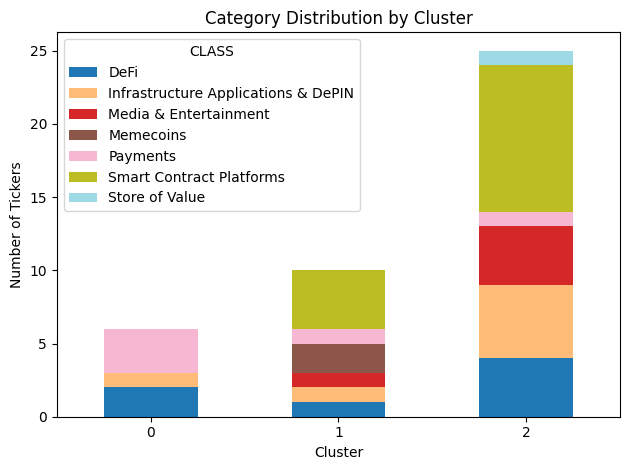

In [105]:
visualise_cryptos_in_clusters(coinbase_categories, tickers_with_labels_kshape, 'kshape', just_cryptos=False, heatmap=False)

In [21]:
with open('crypto_subclusters_3clusters.json', 'w') as f:
    json.dump(tickers_with_labels_kshape, f)


In [28]:
tickers_with_labels_kshape

{'BTCUSDT': 2,
 'ETHUSDT': 2,
 'XRPUSDT': 0,
 'SOLUSDT': 2,
 'DOGEUSDT': 1,
 'ADAUSDT': 2,
 'LINKUSDT': 2,
 'XLMUSDT': 0,
 'AVAXUSDT': 2,
 'SHIBUSDT': 1,
 'DOTUSDT': 2,
 'LTCUSDT': 1,
 'BCHUSDT': 0,
 'UNIUSDT': 1,
 'NEARUSDT': 2,
 'ICPUSDT': 2,
 'ETCUSDT': 1,
 'AAVEUSDT': 2,
 'RNDRUSDT': 2,
 'ATOMUSDT': 1,
 'MATICUSDT': 1,
 'ALGOUSDT': 2,
 'EOSUSDT': 1,
 'MKRUSDT': 0,
 'QNTUSDT': 1,
 'STXUSDT': 2,
 'INJUSDT': 2,
 'GRTUSDT': 2,
 'XTZUSDT': 2,
 'CRVUSDT': 2,
 'SANDUSDT': 2,
 'ZECUSDT': 2,
 'JASMYUSDT': 2,
 'MANAUSDT': 2,
 'AXSUSDT': 2,
 'CHZUSDT': 1,
 'COMPUSDT': 0,
 '1INCHUSDT': 2,
 'SNXUSDT': 2,
 'ROSEUSDT': 2,
 'LPTUSDT': 0}

In [95]:
import requests

# List of symbols you want (strip 'USDT' suffix)
symbols = ['BTC', 'ETH', 'XRP', 'SOL', 'DOGE', 'ADA', 'LINK', 'XLM', 'AVAX', 'SHIB',
           'DOT', 'LTC', 'BCH', 'UNI', 'NEAR', 'ICP', 'ETC', 'AAVE', 'RNDR', 'ATOM',
           'MATIC', 'ALGO', 'EOS', 'MKR', 'QNT', 'STX', 'INJ', 'GRT', 'XTZ', 'CRV',
           'SAND', 'ZEC', 'JASMY', 'MANA', 'AXS', 'CHZ', 'COMP', '1INCH', 'SNX',
           'ROSE', 'LPT']

# Step 1: Get CoinGecko coin list and map symbols to IDs
url_list = "https://api.coingecko.com/api/v3/coins/list"
all_coins = requests.get(url_list).json()

symbol_to_id = {}
for coin in all_coins:
    if coin['symbol'].upper() in [s.upper() for s in symbols]:
        symbol_to_id[coin['symbol'].upper()] = coin['id']

# Step 2: Fetch market data for these coins
url_market = "https://api.coingecko.com/api/v3/coins/markets"
params = {
    'vs_currency': 'usd',
    'ids': ','.join(set(symbol_to_id.values())),
    'per_page': 250,
    'page': 1
}
response = requests.get(url_market, params=params)
data = response.json()

# Step 3: Extract symbol, name, 24h trading volume, and market cap
records = []
for coin in data:
    records.append({
        'Symbol': coin['symbol'].upper(),
        'Name': coin['name'],
        '24h Volume (USD)': coin['total_volume'],
        'Market Cap (USD)': coin['market_cap']
    })

# Step 4: Create DataFrame
df_volumes = pd.DataFrame(records)

# Optional: Sort by market cap
df_volumes = df_volumes.sort_values(by='Market Cap (USD)', ascending=False)

df_volumes = df_volumes.drop(columns=['Name'])


In [96]:
cluster_assignments = {k.replace('USDT', "") :v for k,v  in tickers_with_labels_kshape.items()}

df_volumes['Cluster'] = df_volumes['Symbol'].map(cluster_assignments)

In [97]:
import yfinance as yf

sp500 = yf.download('^GSPC', start='2022-01-01', end='2023-12-31')

# Calculate daily returns
sp500 = sp500['Close']
sp500.index = pd.to_datetime(sp500.index)

full_prices = pd.merge(sp500, cryptos_df, how='left', left_index=True, right_index=True)

[*********************100%***********************]  1 of 1 completed


In [ ]:
returns_df = full_prices.pct_change().dropna()

# Create results storage
correlation_results = []

for asset in returns_df.columns:
    if asset in tickers_with_labels_kshape and asset != 'SP500':
        cluster = tickers_with_labels_kshape[asset]
        corr_with_btc = returns_df[asset].corr(returns_df['BTCUSDT'])
        corr_with_sp500 = returns_df[asset].corr(returns_df['^GSPC'])
        correlation_results.append({
            'Asset': asset,
            'Cluster': cluster,
            'Corr with BTC': corr_with_btc,
            'Corr with SP500': corr_with_sp500
        })

# Create summary DataFrame
df_corr = pd.DataFrame(correlation_results)

df_corr['key'] = df_corr['Asset'].apply(lambda x: x.replace('USDT', ''))

In [99]:
df_join = pd.merge(df_volumes, df_corr, how='inner', left_on='Symbol', right_on='key')

In [100]:
df_summary = df_join.groupby('Cluster_x').agg(avg_volume = ('24h Volume (USD)', 'mean'), avg_market_cap = ('Market Cap (USD)', 'mean'), 
                                              avg_btc_corr = ('Corr with BTC', 'mean'), avg_sp_corr = ('Corr with SP500', 'mean'))
df_summary['avg_volume'] = df_summary['avg_volume'].apply(lambda x: f"{x:,.0f}")
df_summary['avg_market_cap'] = df_summary['avg_market_cap'].apply(lambda x: f"{x:,.0f}")
df_summary

,avg_volume,avg_market_cap,avg_btc_corr,avg_sp_corr
Cluster_x,,,,
0,"147,963,805","2,971,045,610",0.635912,0.354693
1,"64,851,293","1,414,775,167",0.669614,0.378565
2,"149,903,552","1,856,253,661",0.699984,0.376340


In [119]:
sp_agg = returns_df['^GSPC'].resample('3D').last()
sp_scaled = sp_agg.rolling(window=30, center=False).mean()
sp_scaled = np.log(sp_scaled / sp_scaled.shift(1)).dropna()

for centroid in cluster_centroids_kshape:
    centroid_series = pd.Series(centroid.flatten())

    corr_with_sp500 = centroid_series.corr(sp_scaled) #I NEED TO SCALE THE S&P500 THE SAME WAY TO COMPARE (214)

c:\Users\Kirill\Documents\Projects\thesis\venv312\Lib\site-packages\pandas\core\arraylike.py:399: RuntimeWarning: invalid value encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)


In [121]:
centroid_series

0     -0.742121
1     -0.734844
2     -0.566069
3      0.103941
4      0.333827
         ...   
209    2.038447
210    2.272129
211   -0.005182
212   -0.005182
213   -0.005182
Length: 214, dtype: float64

In [122]:
sp_scaled

Date
2022-04-04    0.124515
2022-04-07   -0.018892
2022-04-10    0.081569
2022-04-13    0.150886
2022-04-16   -0.218698
                ...   
2023-12-16    0.188042
2023-12-19    0.280123
2023-12-22   -0.046912
2023-12-25   -0.095089
2023-12-28   -0.002616
Name: ^GSPC, Length: 104, dtype: float64